## Anomaly detection : Scaled Data

In [2]:
### autoreloader
%load_ext autoreload
%autoreload 2

In [3]:
### setting up the path
import sys
sys.path.append('../')

In [9]:
### importing the functions
from src.process_data.data import load_data, get_info, get_nan_duplicates_shape
from src.unsupervised_ml.pca import reduce_dim, get_shape
from src.unsupervised_ml.anomaly import find_threshold, find_contamination, outliers_isolation_forest, outliers_lof, outliers_dbscan

In [5]:
### setting up the data path for the scaled train and test 
### price column is excluded from anomaly detection
df_scaled_train_path = '../data/model_ready/scaled/train_scaled.csv'
df_scaled_test_path = '../data/model_ready/scaled/test_scaled.csv'

### *************** scaled data : Train ****************

In [6]:
### loading the data
df_scaled_train = load_data(df_scaled_train_path)
df_scaled_train.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448


In [7]:
### get the shape
get_nan_duplicates_shape(df_scaled_train)

Shape : (10683, 14) 
Duplicates : 470 
Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64


In [8]:
### reducing the dimensons to 2 using the pca
df_scaled_train = reduce_dim(df_scaled_train)
df_scaled_train

array([[ 1.6431797 , -0.52896602],
       [-0.33207083,  0.44094472],
       [-1.77045694,  0.83142765],
       ...,
       [ 1.54163183,  0.2635904 ],
       [ 1.60166193, -0.70427046],
       [-1.6846525 ,  0.1749168 ]])

In [11]:
### veryfying the shape of the reduced data
get_shape(df_scaled_train)

(10683, 14)

##### ============== Isolation forest ==============

[-0.69053474 -0.69053474 -0.68913454 ... -0.40807567 -0.40804746
 -0.40774717]


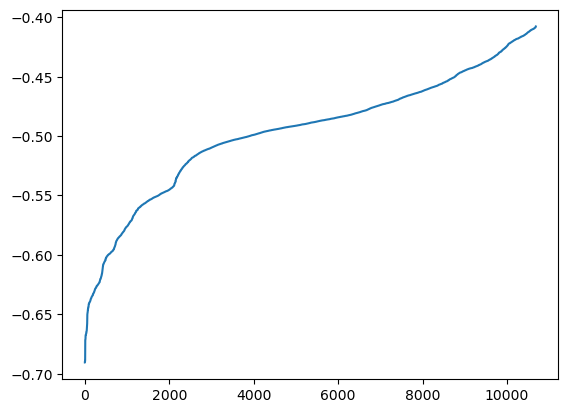

In [26]:
### finding the value of the threshold
scores_train = find_threshold(df_scaled_train)

In [27]:
### veryfying the scores to pass for the next function
scores_train

array([-0.69053474, -0.69053474, -0.68913454, ..., -0.40807567,
       -0.40804746, -0.40774717])

In [28]:
### from the graph the sharp drop is around -0.62, so we use -0.62 to find the value of the contamination
find_contamination(df_scaled_train, scores_train, threshold = -0.62)

371
0.03472807263877187


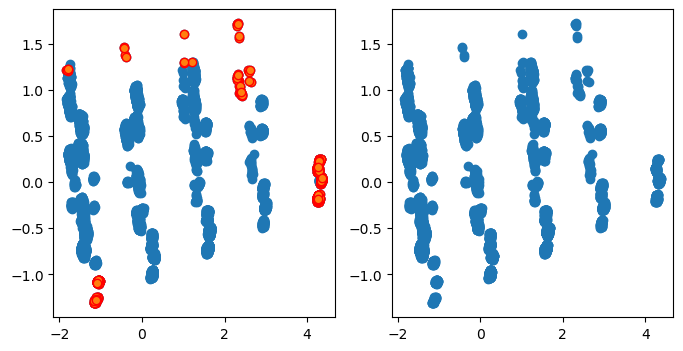

In [13]:
### taking contamination as 0.04(to round off the things) and plotting the outliers
outliers_isolation_forest(df_scaled_train, contamination = 0.04)

##### ================ Local outlier factor (LOF) =====================

In [15]:
### for the lof, I considered n_neighbors as 5 and n = 4, algorithm = 'auto' and leaf_size = 30
### as for the local outliers we wanna detect wuth respect to the closest clusters rather than
### finding out the overall outliers

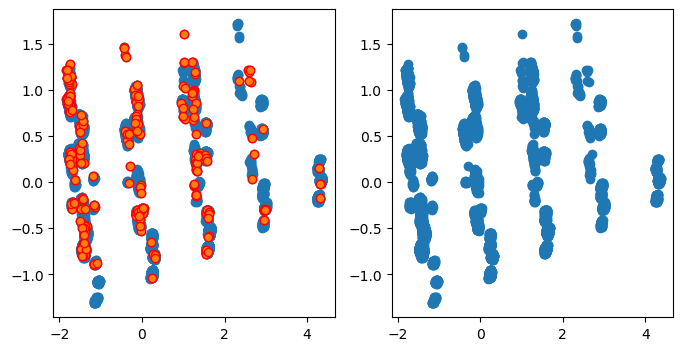

In [14]:
### n = 5
outliers_lof(df_scaled_train, n = 5)

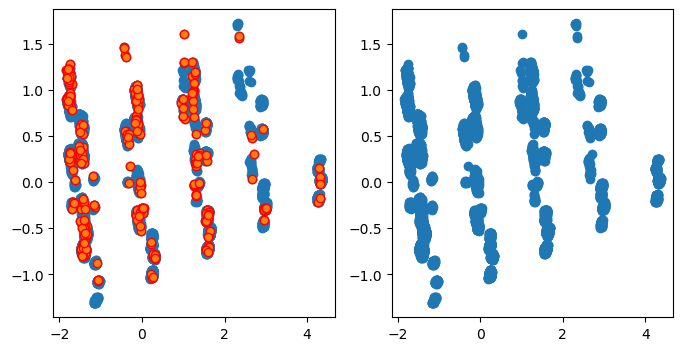

In [16]:
### n = 4
outliers_lof(df_scaled_train, n = 4)

##### =============== DBScan for outliers ==================

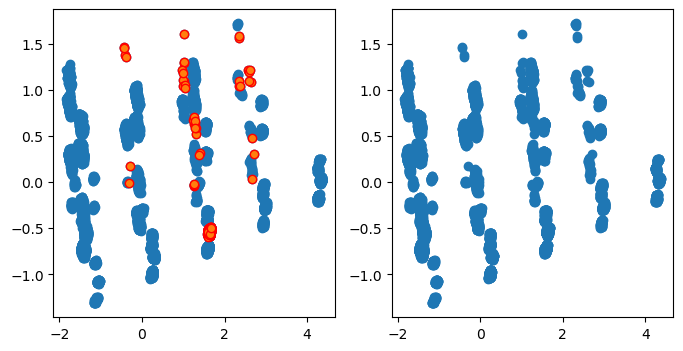

In [17]:
### taking eps as 0.04 (one from the clustering phase)
outliers_dbscan(df_scaled_train, eps = 0.04)

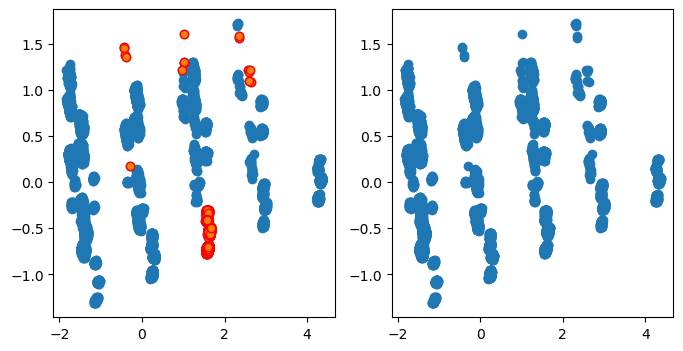

In [18]:
### taking eps as 0.1
outliers_dbscan(df_scaled_train, eps = 0.1)

### *************** scaled data : Test ****************

In [12]:
### loading the data
df_scaled_test = load_data(df_scaled_test_path)
df_scaled_test.head()

,Source,Destination,Total_Stops,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,0,0,1,0,1,0,0,0.192308,1.000000,0.739130,0.545455,0.173913,0.454545,0.230769
1,1,1,1,1,0,0,0,0.423077,0.666667,0.260870,0.363636,0.434783,0.363636,0.076923
2,0,0,1,0,1,0,1,0.769231,0.666667,0.826087,0.272727,0.826087,0.000000,0.564103
3,0,0,1,0,0,1,0,0.769231,0.666667,0.347826,0.000000,0.913043,0.000000,0.307692
4,2,2,0,0,0,1,0,0.884615,1.000000,1.000000,1.000000,0.086957,0.818182,0.025641


In [13]:
### checking the nan
get_nan_duplicates_shape(df_scaled_test)

Shape : (2671, 14) 
Duplicates : 28 
Source                       0
Destination                  0
Total_Stops                  0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64


In [23]:
### reducing the dimensons to 2 using the pca
df_scaled_test = reduce_dim(df_scaled_test)
df_scaled_test

array([[-1.43083118,  0.34386814],
       [-0.01795358, -0.2196466 ],
       [-1.46121847,  0.70763697],
       ...,
       [-1.3756598 ,  0.39127251],
       [-1.4104317 , -0.19772705],
       [-1.42841761, -0.69361464]])

In [15]:
### veryfying the dimensons of the reduced data
get_shape(df_scaled_test)

(2671, 14)

##### =================== Isolation forest =================

[-0.68480534 -0.68269062 -0.68255607 ... -0.40986796 -0.40916382
 -0.40870676]


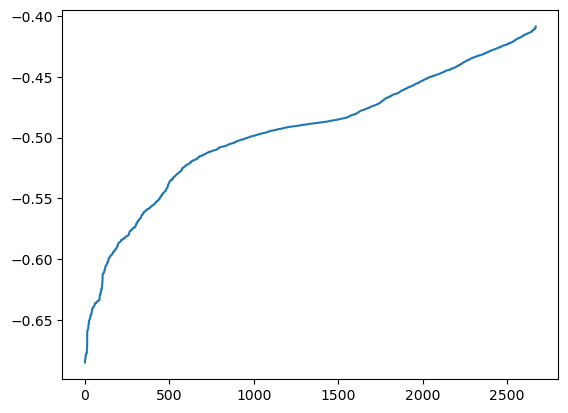

In [29]:
### finding the value of the threhold for the contamination
scores_test = find_threshold(df_scaled_test)

In [30]:
### checking the scores to pass to the next function
scores_test

array([-0.68480534, -0.68269062, -0.68255607, ..., -0.40986796,
       -0.40916382, -0.40870676])

In [31]:
### taking the threshold as -0.65 and getting the value of the contamination
find_contamination(df_scaled_test, scores_test, threshold = -0.65)

26
0.009734181954324184


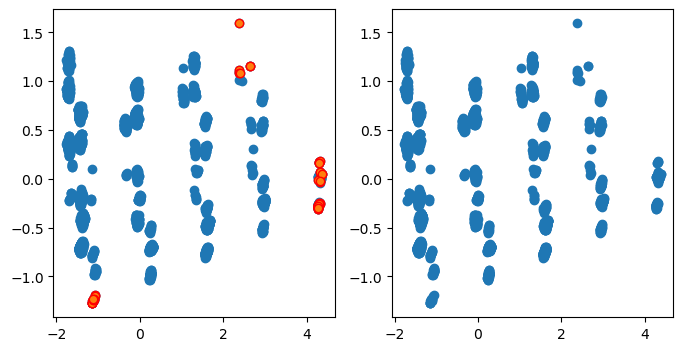

In [32]:
### taking the contamination as 0.02 to round off the things
outliers_isolation_forest(df_scaled_test, contamination = 0.02)

##### ================= Local outliers factor (LOF) =====================

In [33]:
### same as we did on the train data, I will take n = 5 and 4

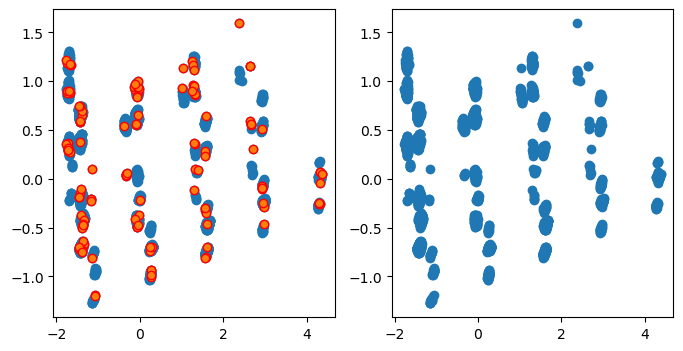

In [34]:
### taking n = 5
outliers_lof(df_scaled_test, n = 5)

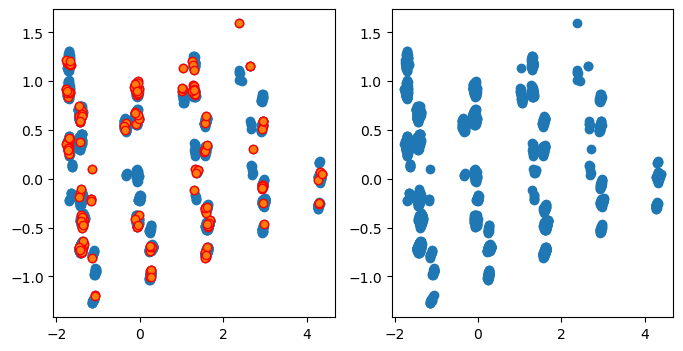

In [35]:
### taking n = 4
outliers_lof(df_scaled_test, n = 4)

##### ============= DBScan for anomaly detection ================

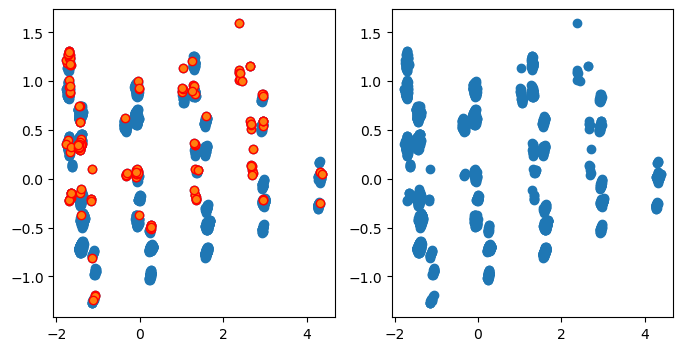

In [36]:
### taking eps as 0.02 from the clustering
outliers_dbscan(df_scaled_test, eps = 0.02)

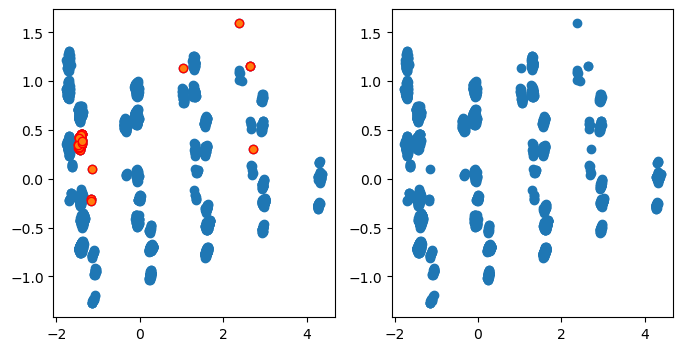

In [37]:
### taking the eps as 0.1
outliers_dbscan(df_scaled_test, eps = 0.1)